# K Nearest Neighbors
k-Nearest Neighbors (k-NN) is a nonparametric learning algorithm used for classification and regression. Unlike parametric models, k-NN does not make strong assumptions about the data's distribution, making it highly flexible but also slower and more memory-intensive.

The basic idea is that data points that are close together are likely to have the same label. It works by finding the k closest training points to a new data point and predicting its label based on the majority vote (for classification) or the average (for regression).

We will be using a dataset comparing oranges vs grapefruit to demonstrate k-NN. 

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

# Load the citrus dataset
df = pd.read_csv('citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


Let us first split the data into training and testing sets. Then, we will try plotting red (average red reading from an RGB scan) vs. diameter of the training set.

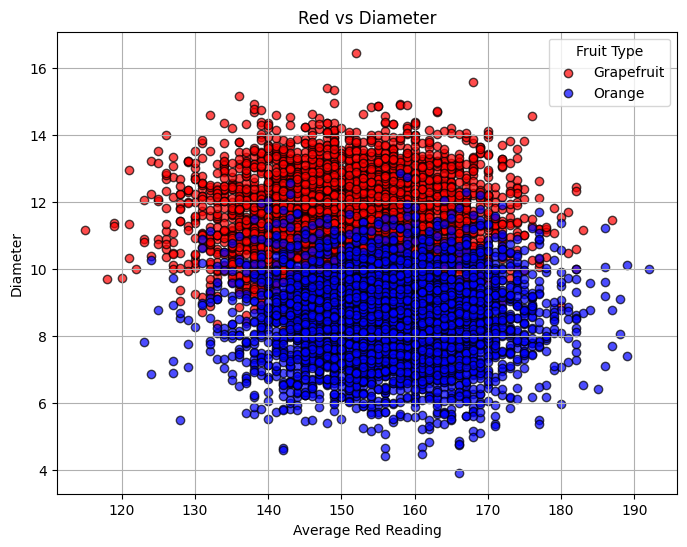

In [21]:
# Split into train/test
X = df.drop('name', axis=1)
y = df['name']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Plot red vs diameter
plt.figure(figsize=(8,6))
# Plot class 0 (e.g., grapefruit)
plt.scatter(X_train[y_train == 0]['red'], 
            X_train[y_train == 0]['diameter'],
            color='red', label='Grapefruit', edgecolor='k', alpha=0.7)

# Plot class 1 (e.g., orange)
plt.scatter(X_train[y_train == 1]['red'], 
            X_train[y_train == 1]['diameter'],
            color='blue', label='Orange', edgecolor='k', alpha=0.7)
plt.title('Red vs Diameter')
plt.xlabel('Average Red Reading')
plt.ylabel('Diameter')
plt.legend(title='Fruit Type')
plt.grid(True)
plt.show()

There is good separation between grapefruit and orange. Similar data points are clearly grouped together, so we can move forward with the k-NN algorithm. Next, we will train the k-NN Classifier, which we imported from scikit-learn.

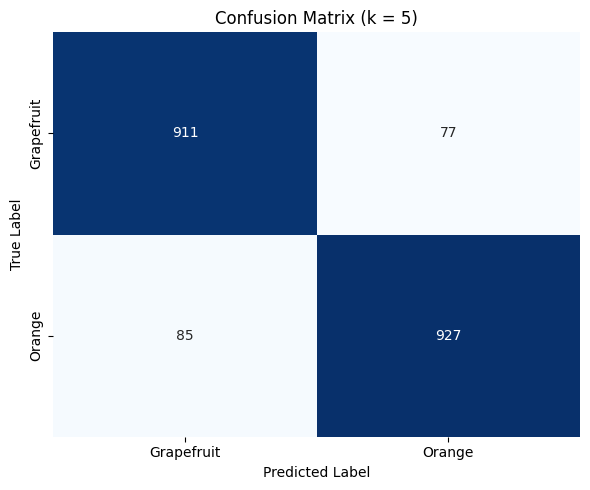

Accuracy on Test Set (k=5): 0.919


In [29]:
# Train k-NN classifier
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Evaulate on test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Grapefruit', 'Orange'], 
            yticklabels=['Grapefruit', 'Orange'])

plt.title(f'Confusion Matrix (k = {k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print('Accuracy on Test Set (k=5):', accuracy_score(y_test, y_pred))

Choosing the right k is important: small values can lead to overfitting, while large values may underfit. To select k properly, a validation set should be used rather than the test set. k-fold cross-validation is a method where the training data is split into multiple train/validation sets to refine model selection.

We can test out k values from 1 to 15 and check how accurate each one is with k-fold cross validation, then use the best k value to run on our test set.

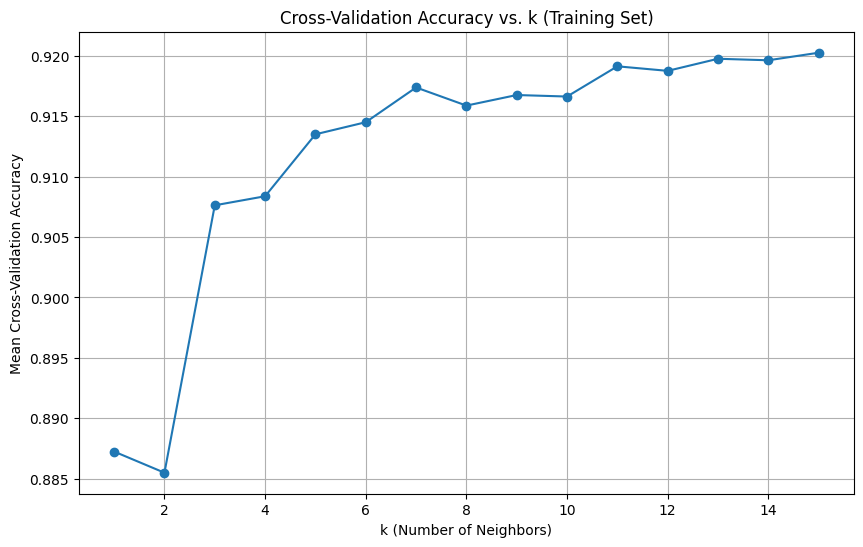

Best k found: 15 with Cross-Validation Accuracy: 0.9203


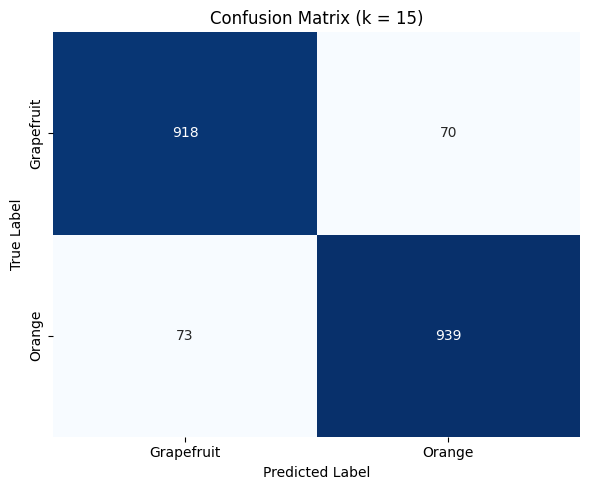

Accuracy on Test Set (Best k): 0.9285


In [30]:
# Find the best k (1 to 15)

k_values = list(range(1, 16))
cv_scores = []

for k in k_values:
    model_new = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model_new, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot k vs cross-validation accuracy
plt.figure(figsize=(10,6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Accuracy vs. k (Training Set)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(cv_scores)]
print(f'Best k found: {best_k} with Cross-Validation Accuracy: {max(cv_scores):.4f}')

# Re-train model using best k
model_best = KNeighborsClassifier(n_neighbors=best_k)
model_best.fit(X_train, y_train)

# Confusion matrix for best k value
cm_2 = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Grapefruit', 'Orange'], 
            yticklabels=['Grapefruit', 'Orange'])

plt.title(f'Confusion Matrix (k = {k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Evaluate best model on test set
y_pred_best = model_best.predict(X_test)
print('Accuracy on Test Set (Best k):', accuracy_score(y_test, y_pred_best))

From the line graph, we observe that in this dataset, model accuracy increases as k increases. A k-value of 15 resulted in a test set accuracy of 0.9285, compared to 0.919 with our original model using k=5.

Although powerful, k-NN can struggle in high-dimensional spaces due to the "curse of dimensionality," where distances lose meaning and performance degrades.